In [16]:
!pip install pandas nltk vaderSentiment
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
# Load the dataset
df = pd.read_csv('tweets.csv')  # replace with your actual file path

# Display the first few rows of the dataset
print(df.head())

# Preprocess: Clean the tweet text
def clean_text(text):
    # Ensure the input is a string
    if isinstance(text, str):
        # Remove URLs, mentions, and special characters
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
        text = re.sub(r'@\w+', '', text)  # Remove mentions
        text = re.sub(r'[^A-Za-z0-9\s]+', '', text)  # Remove special characters
        text = text.lower()  # Convert to lowercase
        return text
    else:
        return ""  # Return empty string if the input is not a valid string


# Apply the cleaning function to the 'Tweet Text' column
df['Cleaned Tweet Text'] = df['Tweet Text'].apply(clean_text)

# Show the cleaned dataset
print(df[['Tweet Text', 'Cleaned Tweet Text']].head())


                  Tweet Text  Sentiment Score Sentiment Label  \
0         "You are amazing!"              0.8        Positive   
1    "I hate everyone here!"             -0.9        Negative   
2  "This is not great work!"             -0.5        Negative   
3     "I love this weather!"              0.6        Positive   
4  "Why are people so rude?"             -0.7        Negative   

  Negative Keywords    Cleaned Tweet Text  Emoji Count  Hashtags Count  \
0                 -             "amazing"            2             1.0   
1            "hate"  "hate everyone here"            0             0.0   
2      "not, great"      "not great work"            1             1.0   
3                 -        "love weather"            3             2.0   
4            "rude"         "people rude"            1             1.0   

   Profanity Count  
0              0.0  
1              2.0  
2              1.0  
3              0.0  
4              1.0  
                  Tweet Text      Clea

C:\Users\HP\AppData\Local\Temp\ipykernel_25740\115635539.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment Label", data=df, palette={"Positive": "green", "Negative": "red", "Neutral": "gray"})


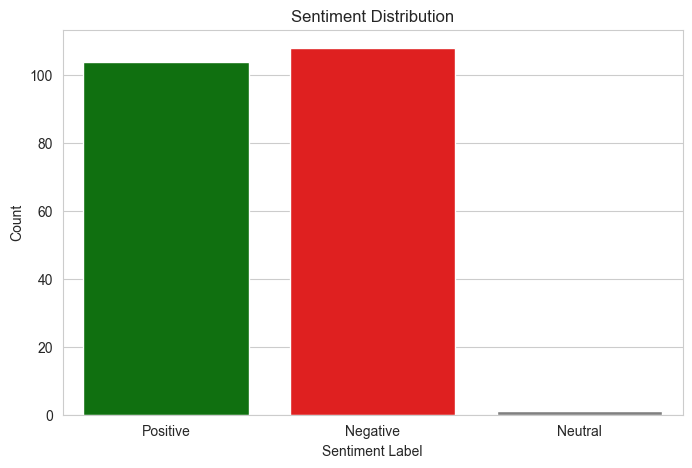

In [18]:
# Set style
sns.set_style("whitegrid")

# Countplot for sentiment labels
plt.figure(figsize=(8, 5))
sns.countplot(x="Sentiment Label", data=df, palette={"Positive": "green", "Negative": "red", "Neutral": "gray"})
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Label")
plt.ylabel("Count")
plt.show()

In [19]:
# Check if there's a timestamp or date-related column
df.columns

Index(['Tweet Text', 'Sentiment Score', 'Sentiment Label', 'Negative Keywords',
       'Cleaned Tweet Text', 'Emoji Count', 'Hashtags Count',
       'Profanity Count'],
      dtype='object')

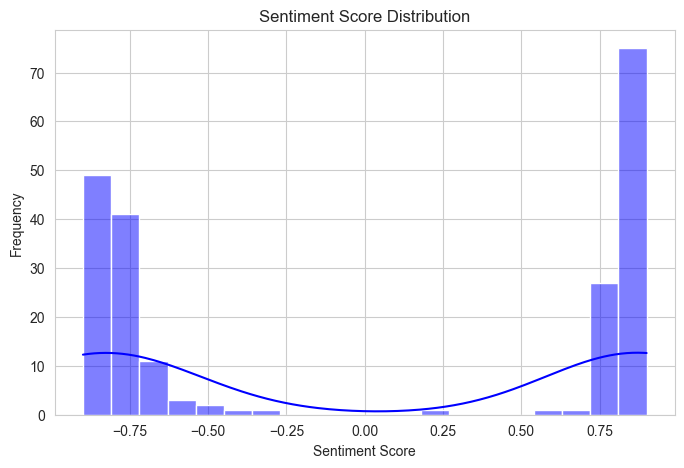

In [20]:
# Histogram of sentiment scores
plt.figure(figsize=(8, 5))
sns.histplot(df["Sentiment Score"], bins=20, kde=True, color="blue")
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

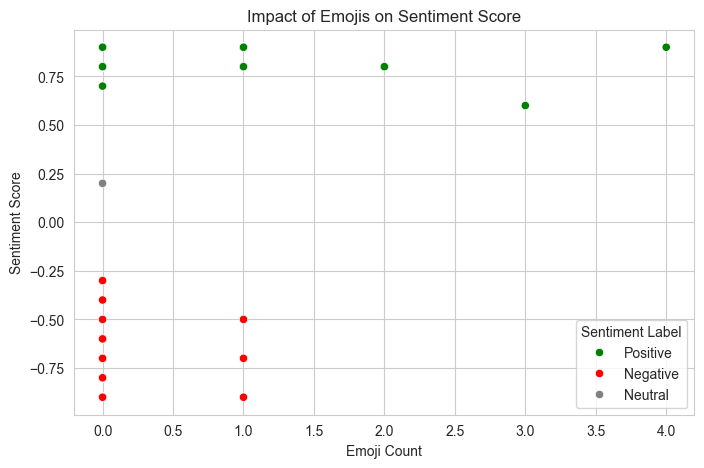

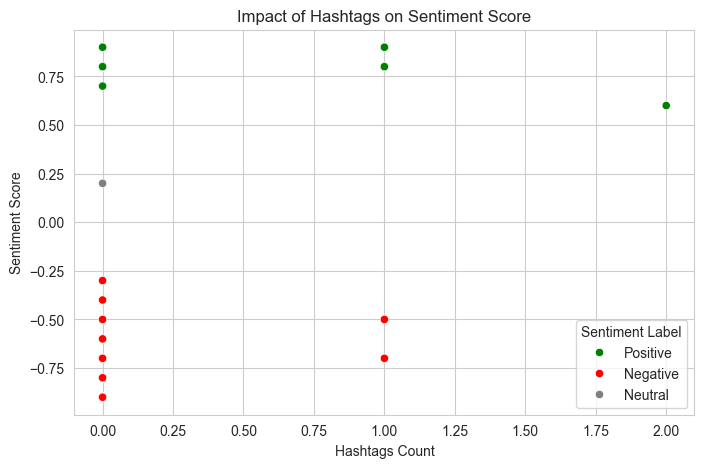

In [21]:
# Scatter plot: Emoji Count vs Sentiment Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Emoji Count"], y=df["Sentiment Score"], hue=df["Sentiment Label"], palette={"Positive": "green", "Negative": "red", "Neutral": "gray"})
plt.title("Impact of Emojis on Sentiment Score")
plt.xlabel("Emoji Count")
plt.ylabel("Sentiment Score")
plt.show()

# Scatter plot: Hashtags Count vs Sentiment Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Hashtags Count"], y=df["Sentiment Score"], hue=df["Sentiment Label"], palette={"Positive": "green", "Negative": "red", "Neutral": "gray"})
plt.title("Impact of Hashtags on Sentiment Score")
plt.xlabel("Hashtags Count")
plt.ylabel("Sentiment Score")
plt.show()

In [22]:
# List of negative keywords (you can expand this list as needed)
negative_keywords = ['hate', 'angry', 'sad', 'upset', 'disappointed', 'bad', 'worst', 'hurt', 'pain']

# Function to identify negative tweets
def is_negative_tweet(text):
    # Tokenize the tweet and check for negative keywords
    words = text.split()
    for word in words:
        if word in negative_keywords:
            return True
    return False

# Apply the function to the 'Cleaned Tweet Text' column to create a new column for negative tweets
df['Is Negative Tweet'] = df['Cleaned Tweet Text'].apply(is_negative_tweet)

# Filter out the negative tweets
negative_tweets = df[df['Is Negative Tweet'] == True]

# Show the filtered negative tweets
print(negative_tweets[['Tweet Text', 'Cleaned Tweet Text', 'Is Negative Tweet']].head())


                                     Tweet Text  \
1                       "I hate everyone here!"   
19   "I? so angry, I can? even think straight!"   
29   "This is the worst product I?e ever used."   
35  "I? really disappointed with this service."   
41   "I hate being stuck in traffic every day!"   

                         Cleaned Tweet Text  Is Negative Tweet  
1                      i hate everyone here               True  
19     i so angry i can even think straight               True  
29   this is the worst product ie ever used               True  
35  i really disappointed with this service               True  
41  i hate being stuck in traffic every day               True  


In [23]:
# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    cleaned_words = [word for word in words if word not in stop_words]
    return " ".join(cleaned_words)

# Apply stop word removal
df['Cleaned Tweet Text'] = df['Cleaned Tweet Text'].apply(remove_stopwords)

# Show the updated dataset
print(df[['Tweet Text', 'Cleaned Tweet Text']].head())


                  Tweet Text Cleaned Tweet Text
0         "You are amazing!"            amazing
1    "I hate everyone here!"      hate everyone
2  "This is not great work!"         great work
3     "I love this weather!"       love weather
4  "Why are people so rude?"        people rude


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# List of negative keywords (you can expand this list as needed)
negative_keywords = ['hate', 'angry', 'sad', 'upset', 'disappointed', 'bad', 'worst', 'hurt', 'pain']

def extract_negative_keywords(text):
    # Find negative keywords in the cleaned text
    words = text.split()
    found_keywords = [word for word in words if word in negative_keywords]
    return " ".join(found_keywords)

# Apply negative keyword extraction
df['Negative Keywords'] = df['Cleaned Tweet Text'].apply(extract_negative_keywords)

# Show the result
print(df[['Tweet Text', 'Negative Keywords']].head())


                  Tweet Text Negative Keywords
0         "You are amazing!"                  
1    "I hate everyone here!"              hate
2  "This is not great work!"                  
3     "I love this weather!"                  
4  "Why are people so rude?"                  


In [25]:
# Tokenize the cleaned tweet text
def tokenize_text(text):
    return text.split()  # Simple split on space; NLTK tokenizer could be used for better results

df['Tokenized Tweet'] = df['Cleaned Tweet Text'].apply(tokenize_text)

# Show the tokenized tweets
print(df[['Tweet Text', 'Tokenized Tweet']].head())


                  Tweet Text   Tokenized Tweet
0         "You are amazing!"         [amazing]
1    "I hate everyone here!"  [hate, everyone]
2  "This is not great work!"     [great, work]
3     "I love this weather!"   [love, weather]
4  "Why are people so rude?"    [people, rude]


In [26]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to apply VADER sentiment analysis
def analyze_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    if sentiment['compound'] >= 0.05:
        return 'Positive'
    elif sentiment['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment analysis function to the 'Cleaned Tweet Text' column
df['Sentiment'] = df['Cleaned Tweet Text'].apply(analyze_sentiment)

# Show the dataset with the new Sentiment column
print(df[['Tweet Text', 'Cleaned Tweet Text', 'Sentiment']].head())


                  Tweet Text Cleaned Tweet Text Sentiment
0         "You are amazing!"            amazing  Positive
1    "I hate everyone here!"      hate everyone  Negative
2  "This is not great work!"         great work  Positive
3     "I love this weather!"       love weather  Positive
4  "Why are people so rude?"        people rude  Negative


In [27]:
# Save the dataset with sentiment analysis results to a CSV file
df.to_csv('tweet_sentiment_analysis_results.csv', index=False)

print("Results saved to 'tweet_sentiment_analysis_results.csv'")


Results saved to 'tweet_sentiment_analysis_results.csv'


In [28]:
# List of new sample tweets
new_tweets = [
    "I absolutely love this new phone! Best purchase ever!",
    "The service at the restaurant was awful. Never coming back!",
    "I'm feeling okay today, nothing special.",
    "Wow, what an amazing experience I had yesterday!",
    "I'm so angry with how things turned out!"
]

# Create a DataFrame for the new tweets
new_tweets_df = pd.DataFrame(new_tweets, columns=['Tweet Text'])

# Clean the new tweets using the same cleaning function
new_tweets_df['Cleaned Tweet Text'] = new_tweets_df['Tweet Text'].apply(clean_text)

# Apply VADER sentiment analysis to the new tweets
new_tweets_df['Sentiment'] = new_tweets_df['Cleaned Tweet Text'].apply(analyze_sentiment)

# Show the results
print(new_tweets_df)

# Optionally save the new tweets with sentiment results to a CSV file
new_tweets_df.to_csv('new_tweet_sentiment_results.csv', index=False)
print("New tweet sentiment results saved to 'new_tweet_sentiment_results.csv'")


                                          Tweet Text  \
0  I absolutely love this new phone! Best purchas...   
1  The service at the restaurant was awful. Never...   
2           I'm feeling okay today, nothing special.   
3   Wow, what an amazing experience I had yesterday!   
4           I'm so angry with how things turned out!   

                                  Cleaned Tweet Text Sentiment  
0  i absolutely love this new phone best purchase...  Positive  
1  the service at the restaurant was awful never ...  Negative  
2              im feeling okay today nothing special   Neutral  
3     wow what an amazing experience i had yesterday  Positive  
4             im so angry with how things turned out  Negative  
New tweet sentiment results saved to 'new_tweet_sentiment_results.csv'
